In [59]:
from src.data_preprocessor import load_and_process_data, aggregate_to_yearly, filter_data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px

In [60]:
df = load_and_process_data()

2023-11-11 18:55:31,311 - INFO - Loading the latest recent file: data/lsoa-recent.csv
2023-11-11 18:55:31,715 - INFO - Loading the latest historical file: data/lsoa-historical.csv


In [61]:
def group_by(df: pd.DataFrame, columns : list = ['Borough'], agg_func :str ='sum', sort : bool =False) -> pd.DataFrame:
    '''
    Groups a DataFrame by specified column(s) and applies an aggregation function.

    :params df (pd.DataFrame): The DataFrame to group.
    :params columns (str or list): The column(s) to group by.
    :params agg_func (str or dict, optional): The aggregation function(s) to apply. Default is 'sum'.
    :params sort (bool, optional): Whether to sort the grouped data. Default is False.

    :returns pd.DataFrame: The grouped DataFrame.
    '''
    # Ensure columns is a list for consistency
    if isinstance(columns, str):
        columns = [columns]

    # Check if all columns are in DataFrame
    missing_columns = [col for col in columns if col not in df.columns]
    if missing_columns:
        logger.error(f'Column(s) {", ".join(missing_columns)} not found in dataset')
        return None

    grouped_df = df.groupby(by=columns).agg(agg_func)

    if sort:
        grouped_df = grouped_df.sort_values(by=columns)

    return grouped_df

# Example Usage
group_by(df, columns = ['Borough', 'Major Category'])

201903  201904  \
Borough              Major Category                                         
Barking and Dagenham Arson and Criminal Damage              135.0   131.0   
                     Burglary                               127.0   122.0   
                     Drug Offences                          107.0    98.0   
                     Miscellaneous Crimes Against Society    20.0    22.0   
                     Possession of Weapons                   23.0    12.0   
...                                                           ...     ...   
Westminster          Public Order Offences                  261.0   260.0   
                     Robbery                                340.0   396.0   
                     Theft                                 4139.0  4257.0   
                     Vehicle Offences                       418.0   375.0   
                     Violence Against the Person            899.0   801.0   

                                                           201905  201906  \
Borough              Major Category                                         
Barking and Dagenham Arson and Criminal Damage              147.0   115.0   
                     Burglary                               134.0   124.0   
                     Drug Offences                           82.0    92.0   
                     Miscellaneous Crimes Against Society    34.0    28.0   
                     Possession of Weapons                   24.0     8.0   
...                                                           ...     ...   
Westminster          Public Order Offences                  241.0   287.0   
                     Robbery                                367.0   384.0   
                     Theft                                 3836.0  3760.0   
                     Vehicle Offences                       369.0   381.0   
                     Violence Against the Person            894.0   910.0   

                                                           201907  201908  \
Borough              Major Category                                         
Barking and Dagenham Arson and Criminal Damage              136.0   120.0   
                     Burglary                               100.0   102.0   
                     Drug Offences                           99.0    79.0   
                     Miscellaneous Crimes Against Society    17.0    30.0   
                     Possession of Weapons                   10.0     8.0   
...                                                           ...     ...   
Westminster          Public Order Offences                  308.0   319.0   
                     Robbery                                399.0   354.0   
                     Theft                                 3657.0  3406.0   
                     Vehicle Offences                       350.0   308.0   
                     Violence Against the Person            913.0  1017.0   

                                                           201909  201910  \
Borough              Major Category                                         
Barking and Dagenham Arson and Criminal Damage              114.0   113.0   
                     Burglary                               117.0   124.0   
                     Drug Offences                           83.0    94.0   
                     Miscellaneous Crimes Against Society    21.0    22.0   
                     Possession of Weapons                   17.0    13.0   
...                                                           ...     ...   
Westminster          Public Order Offences                  291.0   270.0   
                     Robbery                                320.0   366.0   
                     Theft                                 3169.0  3743.0   
                     Vehicle Offences                       318.0   397.0   
                     Violence Against the Person            839.0   952.0   

                                                   

In [94]:
def get_time_series(df, columns : list = ['Borough', 'Major Category'], agg_func : str = 'sum', crimes : list = ['Theft'], yearly : bool = False):
    
    grouped_by_borough = group_by(df = df, columns = columns, agg_func=agg_func, sort = True)
    yearly_by_borough = aggregate_to_yearly(grouped_by_borough).sort_index(axis = 1)

    # Filtered data by borough and by crime
    filted_data = filter_data(df = grouped_by_borough.reset_index() if yearly == False else yearly_by_borough.reset_index(),
                               column='Major Category', category_filters = crimes).reset_index(drop = True)
    yearly_data_sums = filted_data.drop(columns = ['Borough', 'Major Category']).sum()

    return yearly_data_sums.sort_index()


# Example Usage
crimes = ['Violence Against the Person']
monthly = get_time_series(df = df, crimes = crimes, yearly=False)
yearly = get_time_series(df = df, crimes = crimes, yearly=True)

print(monthly)
print(yearly)

201004    11817.0
201005    12838.0
201006    13042.0
201007    13126.0
201008    11429.0
           ...   
202305    21418.0
202306    22582.0
202307    22055.0
202308    20619.0
202309     8402.0
Length: 162, dtype: float64
2010    105903.0
2011    129711.0
2012    127192.0
2013    122792.0
2014    153594.0
2015    179335.0
2016    189250.0
2017    197415.0
2018    207895.0
2019    217884.0
2020    213175.0
2021    227336.0
2022    232957.0
2023    170708.0
dtype: float64


2023-11-11 19:13:33,679 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-11 19:13:33,689 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


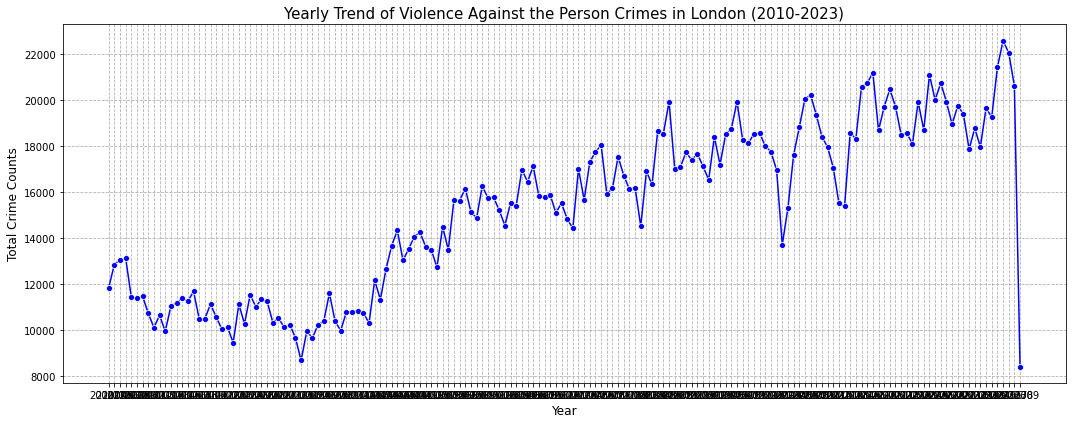

2023-11-11 19:13:35,147 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-11 19:13:35,153 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


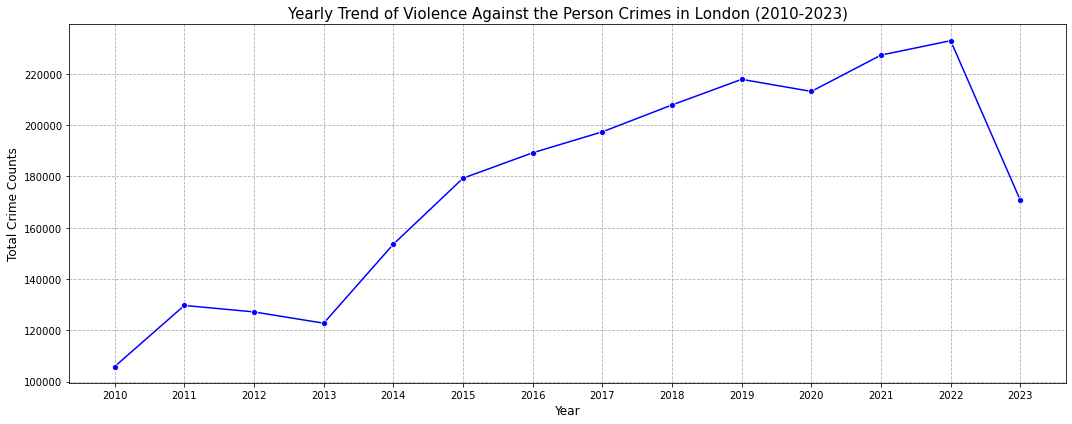

In [95]:
def static_line_plot(data, crimes):
    plt.figure(figsize=(15, 6))
    sns.lineplot(x=data.index, y=data.values, marker="o", color="b")
    plt.title(f'Yearly Trend of {", ".join(str(crime) for crime in crimes)} Crimes in London (2010-2023)', fontsize=15)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Total Crime Counts', fontsize=12)
    plt.grid(True, which="both", ls="--")
    plt.tight_layout()
    plt.show()

# Example usage
static_line_plot(data = monthly, crimes=crimes)
static_line_plot(data = yearly, crimes=crimes)

In [100]:
def interactive_line_plot(data, crimes):
    fig = px.line(data, x=data.index.values, y=data.values,
                markers=True, title=f'Yearly Trend of {", ".join(str(crime) for crime in crimes)} Crimes in London (2010-2023)',
                labels={'x': 'Year', 'y': 'Total Crime Counts'})

    fig.update_layout(xaxis_title='Year',
                    yaxis_title='Total Crime Counts',
                    xaxis=dict(showgrid=True, gridwidth=1, gridcolor='LightPink'),
                    yaxis=dict(showgrid=True, gridwidth=1, gridcolor='LightBlue'),
                    plot_bgcolor='white')

    fig.show()


# Example usage
interactive_line_plot(data = monthly, crimes = crimes)
interactive_line_plot(data = yearly, crimes = crimes)

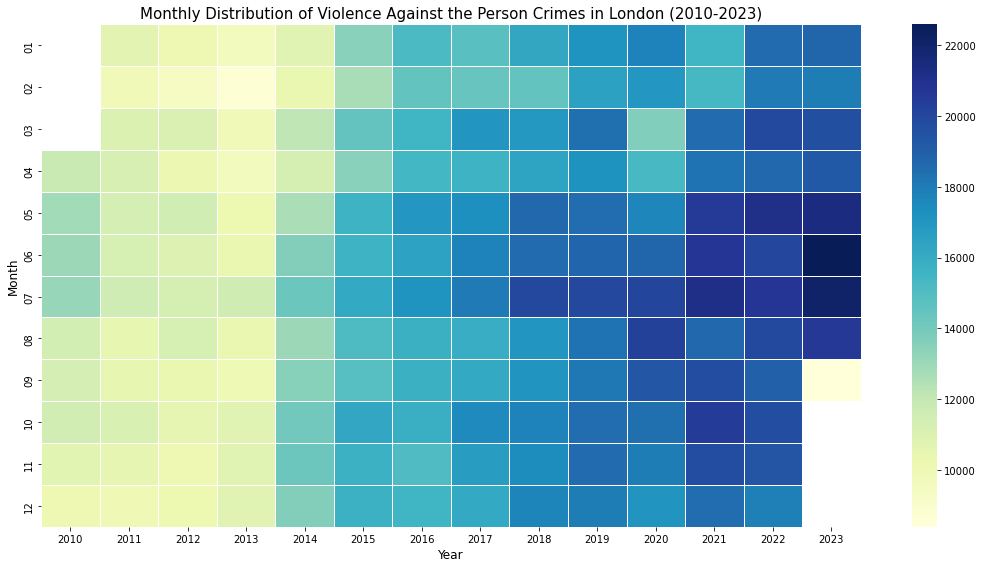

In [101]:
def prep_data_for_monthly_heat_maps(df, crimes):
        
    monthly_totals = get_time_series(df, columns=['Borough', 'Major Category'], crimes=crimes, yearly = False)
    monthly_totals = pd.DataFrame(monthly_totals).reset_index()
    monthly_totals['Year'] = monthly_totals['index'].str[:4]
    monthly_totals['Month'] = monthly_totals['index'].str[4:] 
    monthly_pivot = monthly_totals.pivot("Month", "Year", 0)

    return monthly_pivot


def static_plot_monthly_heatmaps(monthly_pivot, crimes):
    plt.figure(figsize=(15, 8))
    sns.heatmap(monthly_pivot, cmap="YlGnBu", linewidths=.5)
    plt.title(f'Monthly Distribution of {", ".join(str(crime) for crime in crimes)} Crimes in London (2010-2023)', fontsize=15)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Month', fontsize=12)
    plt.tight_layout()
    plt.show()


# Example useage
crimes = ['Violence Against the Person']
monthly_pivot = prep_data_for_monthly_heat_maps(df, crimes)
static_plot_monthly_heatmaps(monthly_pivot=monthly_pivot, crimes=crimes)

In [98]:
def interactive_monthly_heat_map(monthly_pivot, crimes):
    fig = px.imshow(monthly_pivot,
                    labels=dict(x="Year", y="Month", color="Total Crime Counts"),
                    x=monthly_pivot.columns,
                    y=monthly_pivot.index,
                    title=f'Monthly Distribution of {", ".join(str(crime) for crime in crimes)} Crimes in London (2010-2023)',
                    color_continuous_scale='YlGnBu')  # Yellow to Green to Blue color scale

    fig.update_xaxes(side="bottom")
    fig.update_layout(
        xaxis_nticks=36,
        width=1000,  # Set the width of the figure
        height=800   # Set the height of the figure
    )
    fig.show()

# Example usage
interactive_monthly_heat_map(monthly_pivot=monthly_pivot, crimes = crimes)